## Introduction
The Supermart Grocery Sales - Retail Analytics Dataset is a fictional dataset designed to provide data analysts with an opportunity to practice exploratory data analysis and data visualization. It contains data on orders placed by customers using a grocery delivery application in the state of Tamil Nadu, India. The dataset is a useful resource for understanding consumer behavior in the grocery retail industry, and for developing insights into the factors that drive sales in this sector. By analyzing the dataset, data analysts can identify patterns, trends, and correlations that can help retailers optimize their marketing, pricing, and product strategies to increase sales and revenue.
It is a generic dataset with around 10K entries and 11 columns, and is meant to be used as a practice dataset.

## Objectives
The objectives of the project is to

* perform exploratory data analysis to discover any insights and patterns,
* Find out if there are any products that are performing above/below average and if it is statistically significant

The main parts of this project consists of:

- data pre-processing steps
- exploratory data analysis

## Importing libraries and dataset 

In [4]:
# Importing libraries and packages required for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.stats.weightstats import ztest
from scipy.stats import linregress

#File path
filepath = './Source/Supermart Grocery Sales - Retail Analytics Dataset.csv'

In [5]:
# Pandas and Seaborn options
pd.set_option('display.float_format', '{:0.4f}'.format)

sns.set_style('whitegrid')
sns.set_palette('muted')

## Data pre-processing

### Loading Data

In [6]:
# Loading data into sgs(supermart grocery sales) dataframe
raw_sgs = pd.read_csv(filepath)

print(raw_sgs.shape)
raw_sgs.head()

(9994, 11)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.1200,401.2800,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.1800,149.8000,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.2100,165.2000,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.2500,89.6000,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.2600,918.4500,Tamil Nadu


Previewing the dataset shows that there are 9994 entries with 11 columns.

There is the Order ID column which is the primary key. Customer Name column that records the customer that made the purchase

For categorical columns ,there are the [category, sub category, city, region, state]columns that has some detail about each individual order.

There is a Order Date column recording the dates of the order, and finally there is the numerical cols like [Sales, Discount and Profit]

### Data Cleaning
There are a few things that needs to be checked and done before the analysis can proceed.

* Renaming columns to eliminate empty space in between column names
* Validating that columns have the appropriate data type
* Check and remove N/A values or duplicated values if any
* Check for anomalies in categorical and numerical columns (typo errors, values that don't make sense, etc.)

**Renaming Columns for easier access** 

In [22]:
rename_dict = {'Order ID':'order_id',
               'Customer Name':'customer_name',
               'Category':'category',
               'Sub Category':'sub_category',
               'City':'city',
               'Order Date':'order_date',
               'Region':'region',
               'Sales':'sale_price',
               'Discount':'discount',
               'Profit':'profit',
               'State':'state'
              }

raw_sgs = raw_sgs.rename(columns=rename_dict).copy()

**Validating the datatype of each column**

In [10]:
for col in raw_sgs.columns:
    print(col + ' has the datatype: \t',  raw_sgs[col].dtype)

order_id has the datatype: 	 object
customer_name has the datatype: 	 object
category has the datatype: 	 object
sub_category has the datatype: 	 object
city has the datatype: 	 object
order_date has the datatype: 	 object
region has the datatype: 	 object
sale_price has the datatype: 	 int64
discount has the datatype: 	 float64
profit has the datatype: 	 float64
state has the datatype: 	 object


Looking at the results, the order date is not recognised as a datetime object. It needs to be converted to a datetime object column.

From experience, the month and year data might be useful as well. It will be extracted into its own column for easier access.

In [11]:
# Converting order_date to datetime datatype
raw_sgs['order_date'] = pd.to_datetime(raw_sgs['order_date'])

raw_sgs['year'] = raw_sgs['order_date'].apply(lambda x : x.year)
raw_sgs['month'] = raw_sgs['order_date'].apply(lambda x : x.month)

**Checking for N/A and duplicate values**

In [13]:
raw_sgs.isna().all()

order_id         False
customer_name    False
category         False
sub_category     False
city             False
order_date       False
region           False
sale_price       False
discount         False
profit           False
state            False
year             False
month            False
dtype: bool

In [14]:
raw_sgs.duplicated().sum()

0

**Checking for weird values or any error in data**

In [15]:
categorical_columns = ['category','sub_category','city','region', 'state']

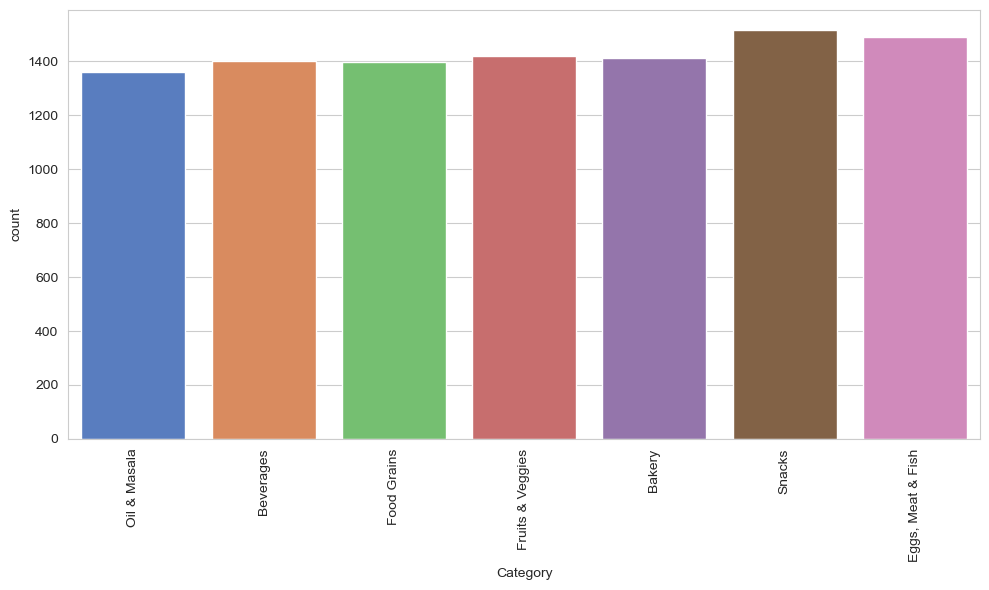

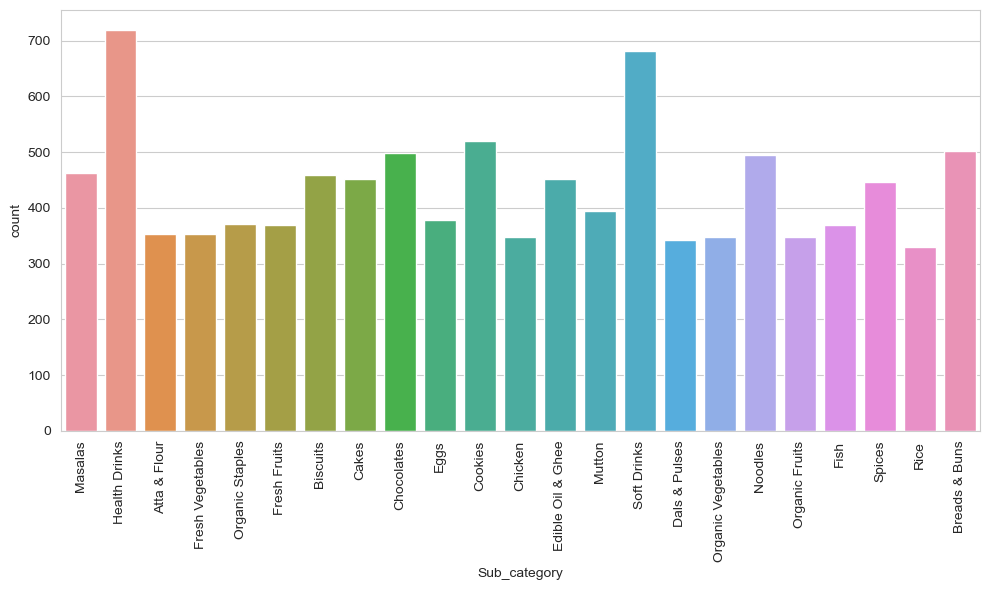

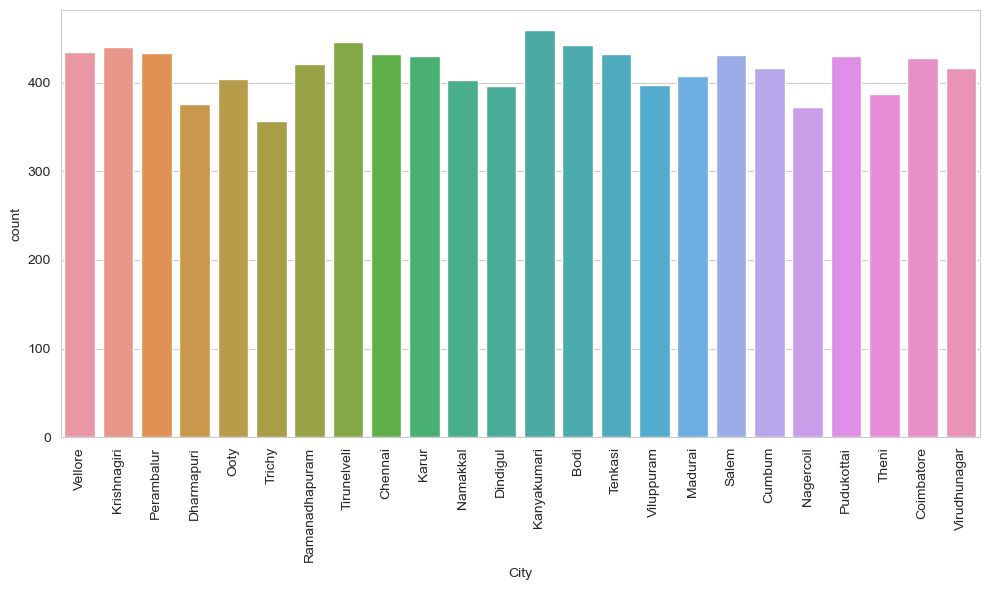

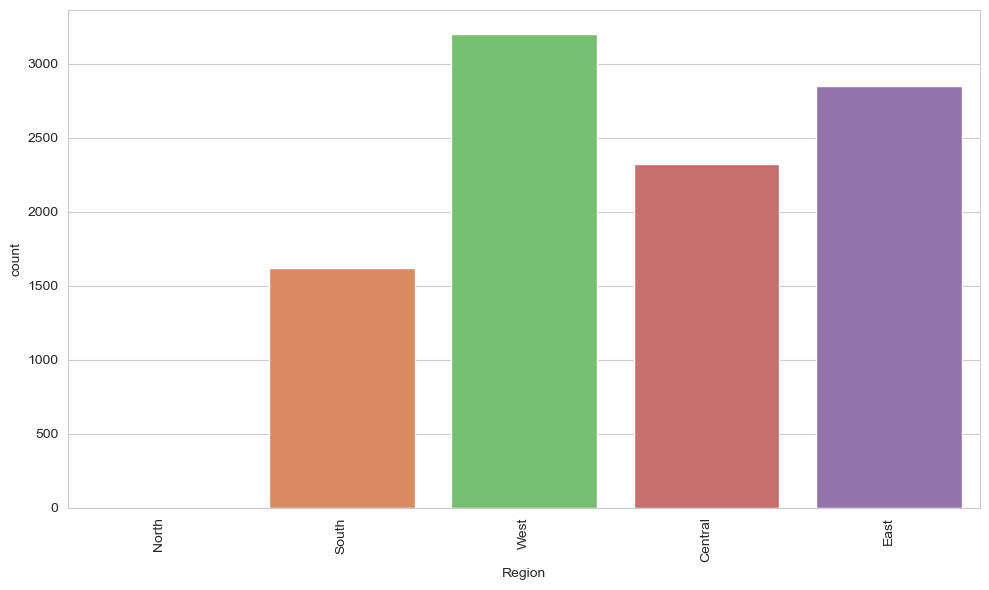

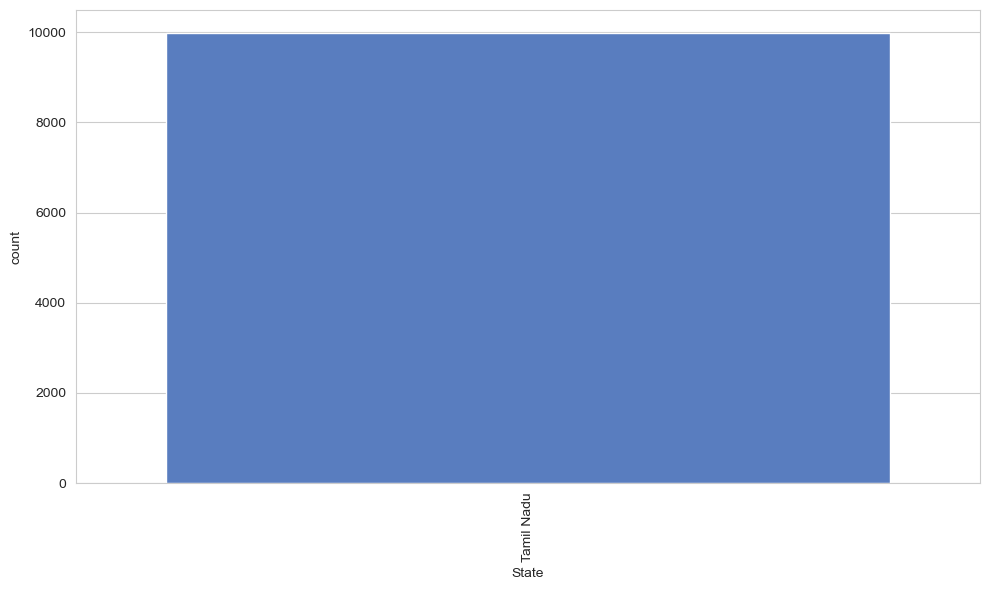

In [16]:
def plot_all_hist(df, columns):
    for col in columns:
        plt.figure(figsize=(10,6))
        sns.countplot(x=col, data=df)
        plt.xlabel(col.capitalize())
        plt.xticks(rotation='90')
        plt.tight_layout()
        plt.show()

plot_all_hist(raw_sgs, categorical_columns)

In [17]:
raw_sgs.region.value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: region, dtype: int64

From the histograms, the findings are:

1. Region column - there is only one row of data for the north region. Considering the fact that it is only one column, it is safe to drop it without much concern of loss of data.
2. The State column contains exclusively one value, which is "Tamil Nadu". This might be a dataset that is filtered by this state in the first place. Considering this, it is safe to drop the entire column as it won't be helpful in the analysis.

In [18]:
# Removing the state column
sgs = raw_sgs.drop(columns=['state']).copy()

# Removing the row of data that contains region == North
index_to_remove = sgs[sgs.region == 'North'].index.values
sgs = sgs.drop(index = index_to_remove).copy()

In [19]:
# Vallidating that the "North" entry has been removed

print(sgs.columns)
print("")
print(sgs.region.value_counts())

Index(['order_id', 'customer_name', 'category', 'sub_category', 'city',
       'order_date', 'region', 'sale_price', 'discount', 'profit', 'year',
       'month'],
      dtype='object')

West       3203
East       2848
Central    2323
South      1619
Name: region, dtype: int64


**Checking numerical columns anomalies**

In [20]:
numerical_cols = ['sale_price','discount','profit']

In [21]:
sgs[numerical_cols].describe()

,sale_price,discount,profit
count,9993.0000,9993.0000,9993.0000
mean,1496.6204,0.2268,374.9344
std,577.5828,0.0746,239.9447
min,500.0000,0.1000,25.2500
25%,1000.0000,0.1600,180.0000
50%,1498.0000,0.2300,320.7600
75%,1995.0000,0.2900,525.6900
max,2500.0000,0.3500,1120.9500


### Adding Features
During the cleaning process, I noticed that there is a column with the discount percentage. To better make use of the discount percentage, we should get the original price and the discounted amount by performing some simple transformations.

In [23]:
sgs['original_price'] = sgs['sale_price']/(1- sgs['discount'])
sgs['discount_amount'] = sgs['original_price'] - sgs['sale_price']
sgs.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sale_price,discount,profit,year,month,original_price,discount_amount
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.1800,149.8000,2017,11,913.4146,164.4146
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.2100,165.2000,2017,6,2987.3418,627.3418
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.2500,89.6000,2016,10,1194.6667,298.6667
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.2600,918.4500,2016,10,3182.4324,827.4324
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.2600,322.7000,2015,6,3114.8649,809.8649


## Exploratory Data Analysis¶
This analysis section is an exploratory section that uncovers some descriptive statistics about the dataset.

The features to explore:

* Sale Price , Profit and Discount amount distribution
* Sales amount and Sale count by year and month
* Relationship between profit and discount amount

### Sale Price, Profit and Discount amount distribution
Let's start by taking a look at the statistics of the numerical columns and it's histogram

In [24]:
def plot_num_histogram(columns):
    for col in columns:  
        print(f'The stats for {col} are as follows:')
        print(sgs[columns].describe())
        print("")
        print(f'The histogram for {col} is shown below:')
        plt.figure(figsize=(10,6))
        plt.hist(sgs[col], bins=20)
        plt.title(col.capitalize() + " Distribution")
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.axvline(sgs[col].mean(), color='red', linestyle='dashed', linewidth=3, label='mean = ' + "{:.2f}".format(sgs[col].mean()))
        plt.axvline(sgs[col].median(), color='green', linestyle='dashdot', linewidth=3, label='median = '+ "{:.2f}".format(sgs[col].median()))
        plt.legend()
        plt.show()
        print('')

The stats for sale_price are as follows:
       sale_price    profit  discount_amount
count   9993.0000 9993.0000        9993.0000
mean    1496.6204  374.9344         456.8789
std      577.5828  239.9447         268.2104
min      500.0000   25.2500          55.6667
25%     1000.0000  180.0000         246.1395
50%     1498.0000  320.7600         398.2963
75%     1995.0000  525.6900         619.1026
max     2500.0000 1120.9500        1345.6154

The histogram for sale_price is shown below:


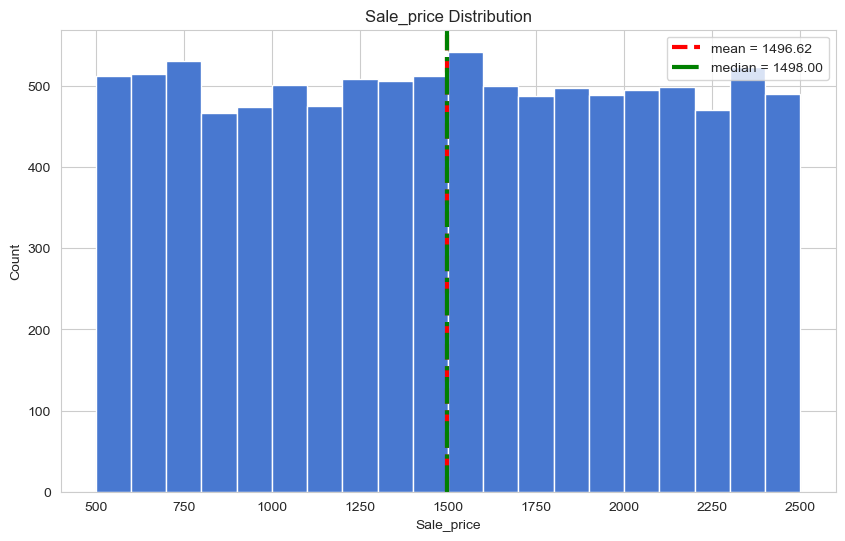


The stats for profit are as follows:
       sale_price    profit  discount_amount
count   9993.0000 9993.0000        9993.0000
mean    1496.6204  374.9344         456.8789
std      577.5828  239.9447         268.2104
min      500.0000   25.2500          55.6667
25%     1000.0000  180.0000         246.1395
50%     1498.0000  320.7600         398.2963
75%     1995.0000  525.6900         619.1026
max     2500.0000 1120.9500        1345.6154

The histogram for profit is shown below:


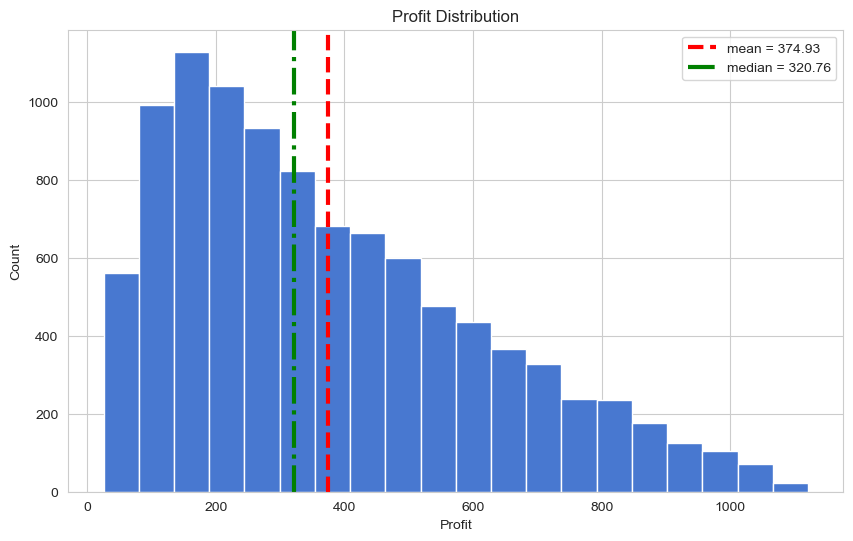


The stats for discount_amount are as follows:
       sale_price    profit  discount_amount
count   9993.0000 9993.0000        9993.0000
mean    1496.6204  374.9344         456.8789
std      577.5828  239.9447         268.2104
min      500.0000   25.2500          55.6667
25%     1000.0000  180.0000         246.1395
50%     1498.0000  320.7600         398.2963
75%     1995.0000  525.6900         619.1026
max     2500.0000 1120.9500        1345.6154

The histogram for discount_amount is shown below:


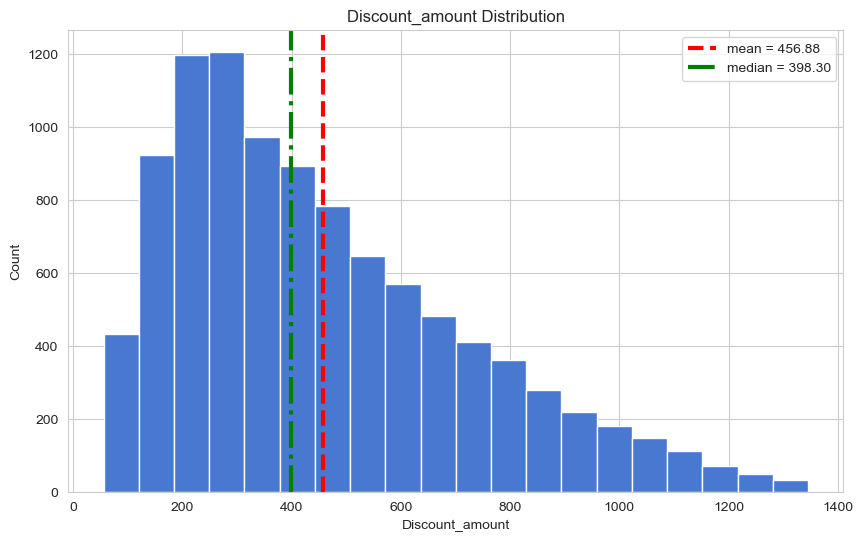

In [25]:
plot_num_histogram(['sale_price', 'profit', 'discount_amount'])

From the data, the following findings can be observed:

* The sale price distribution is uniform, while for both the discount amount and the total profit it is right skewed. This means that:
	* There are a variety of sale prices catering to various levels of purchasing power
	* There are much less instances where there is huge profit or huge discount per order
* The mean sale price is 1496.62, while the median for the profit and discount amount is 320.75 and 398.30 respectively.

### Sales amount and Sale count by year and month

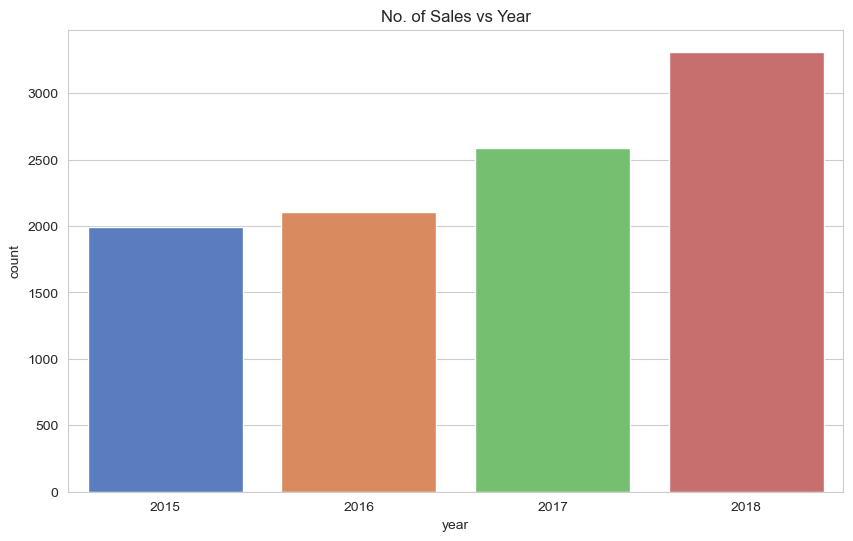

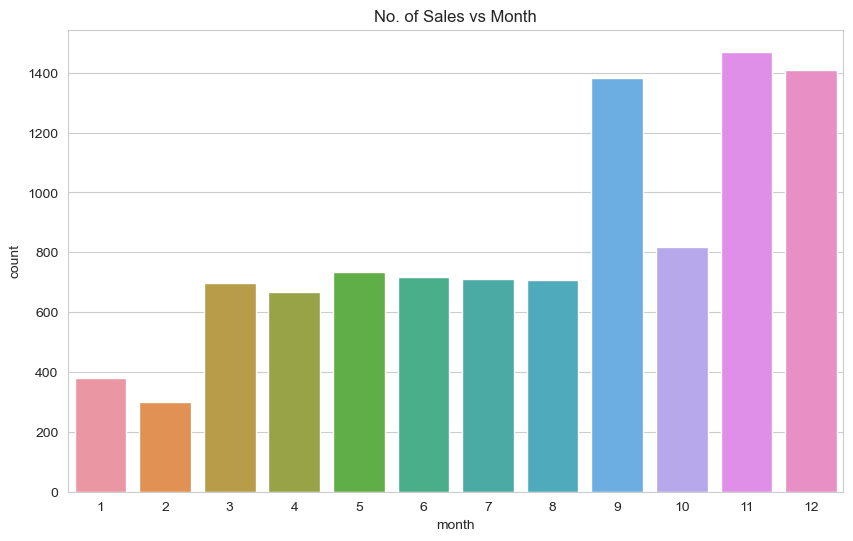

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=sgs, x='year')
plt.title('No. of Sales vs Year')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=sgs, x='month')
plt.title('No. of Sales vs Month')
plt.show()

From the two plots, we are able to make the following observations:

1. There is an increasing trend in the no of sale made per year
2. There is a significantly more amount of purchase made during September, November and December, and much less purchases during January and February.

However this is only the no. of sales, let's take a look at the sales amount and profit over time.

In [27]:
sgs_grouped_by_year = sgs.groupby('year', as_index=False).agg(sale_amount = pd.NamedAgg(column='sale_price', aggfunc='sum'),
                                                             profit_amount = pd.NamedAgg(column='profit', aggfunc='sum'))
sgs_grouped_by_month = sgs.groupby('month', as_index=False).agg(sale_amount = pd.NamedAgg(column='sale_price', aggfunc='sum'),
                                                               profit_amount = pd.NamedAgg(column='profit', aggfunc='sum'))

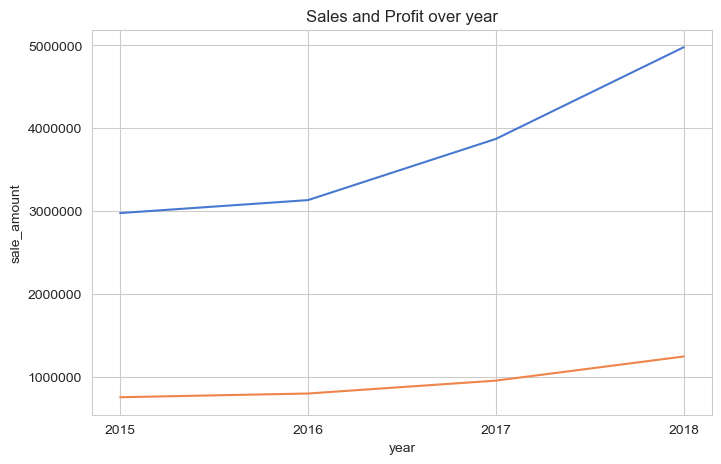

In [28]:
plt.figure(figsize=(8,5))
sns.lineplot(data=sgs_grouped_by_year, x='year', y='sale_amount')
sns.lineplot(data=sgs_grouped_by_year, x='year', y='profit_amount')
plt.xticks(ticks=[2015,2016,2017,2018])
plt.ticklabel_format(style='plain')
plt.title('Sales and Profit over year')
plt.show()

As shown from the plot, it can be seen that the sales amount and profit does increase over the year, however the profit amount is not increasing as much as the sale amount. Let's take a closer look by plotting it in terms of months.

In [29]:
sgs_grouped_by_YM = sgs.groupby(['year','month'], as_index=False).agg(sale_amount = pd.NamedAgg(column='sale_price', aggfunc='sum'),
                                                               profit_amount = pd.NamedAgg(column='profit', aggfunc='sum'),
                                                                     sale_count = pd.NamedAgg(column='profit', aggfunc='count'))

sgs_grouped_by_YM['date'] = np.array(sgs_grouped_by_YM['year'].astype('str') +'-'+ sgs_grouped_by_YM ['month'].astype('str') + '-1', dtype=datetime.date)

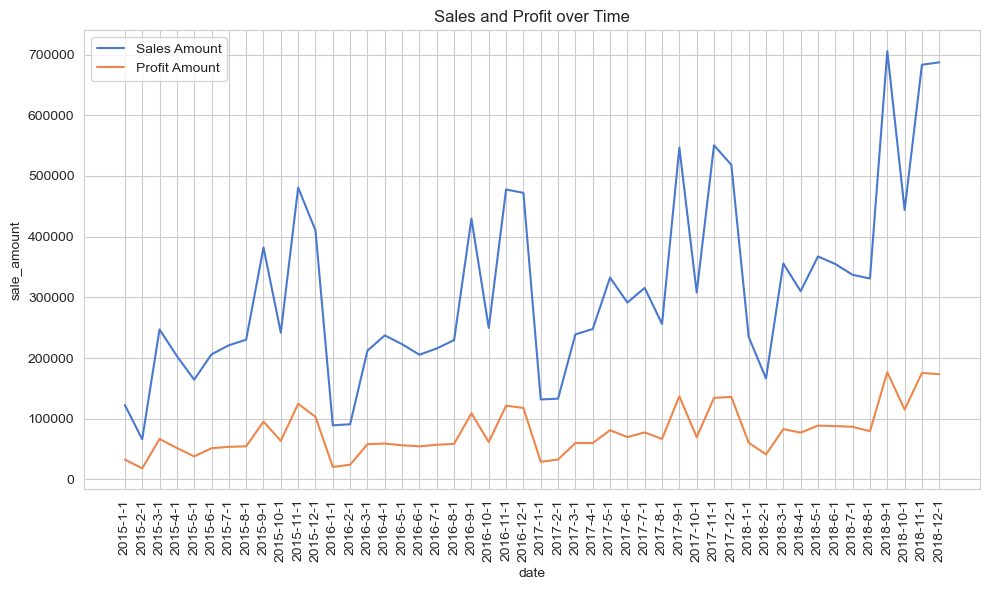

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(data=sgs_grouped_by_YM, x='date', y='sale_amount', label='Sales Amount')
sns.lineplot(data=sgs_grouped_by_YM, x='date', y='profit_amount', label='Profit Amount')
# sns.lineplot(data=sgs_grouped_by_YM, x='date', y='sale_count', label='Sale Count')

plt.legend()
# plt.xticks(ticks=[2015,2016,2017,2018])
plt.xticks(rotation=90)
plt.title('Sales and Profit over Time')
plt.tight_layout()
plt.show()

Here it can be observed that there is a bit of fluctuation. The fluctuation is caused by the findings on the previous section, there was more sales nearing November and December, and less during January and February.

Let's try to smoothen the plot a bit by using the moving average instead.

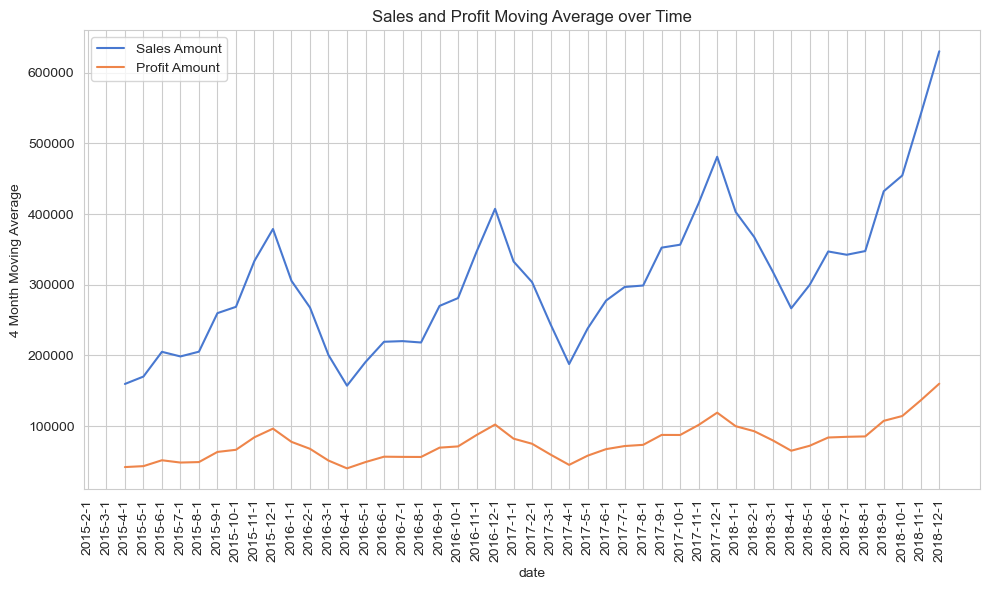

In [32]:
# Plotting using 4 month - Moving Average 
sgs_grouped_by_YM['sale_MA'] = sgs_grouped_by_YM['sale_amount'].rolling(4).mean()
sgs_grouped_by_YM['profit_MA'] = sgs_grouped_by_YM['profit_amount'].rolling(4).mean()

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(data=sgs_grouped_by_YM, x='date', y='sale_MA', label='Sales Amount')
sns.lineplot(data=sgs_grouped_by_YM, x='date', y='profit_MA', label='Profit Amount')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('4 Month Moving Average')
plt.title('Sales and Profit Moving Average over Time')
plt.tight_layout()
plt.show()

The visualization is now smoothen, but still retaining enough amount of data that to show that we experience dips during the start of the year and highs during the later parts of the year.

### Relationship between sales, profit and discount
Now that we know the general trend of sales, profit and sale count is increasing, let's explore if there is any strong correlation between sales, profit and discount amount.

A good way of exploring the correlation between these variables is to use a heat map from the seaborn library.

<AxesSubplot:>

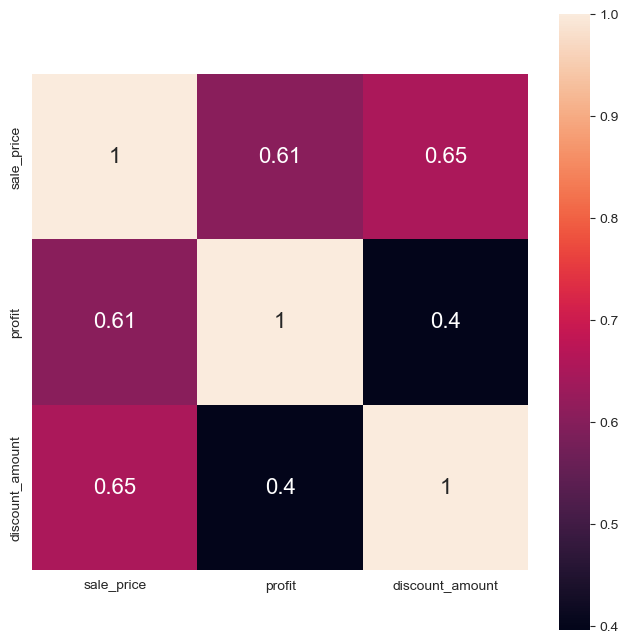

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(sgs[['sale_price','profit','discount_amount']].corr(), square=True, annot=True, annot_kws={"size":16})

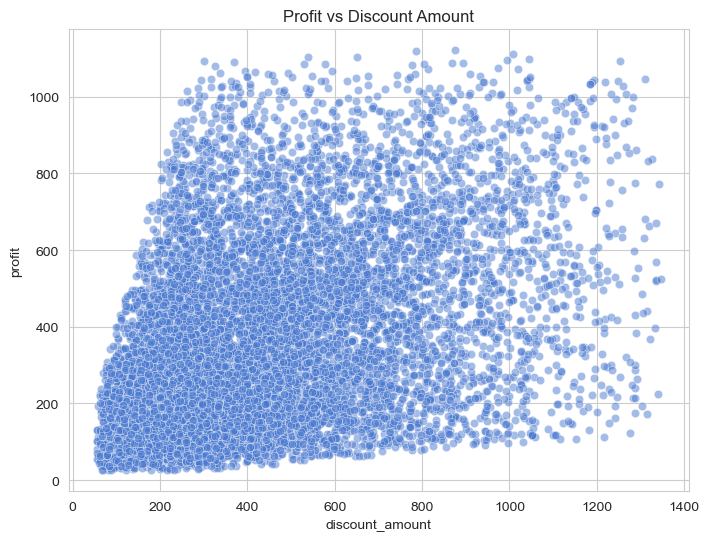

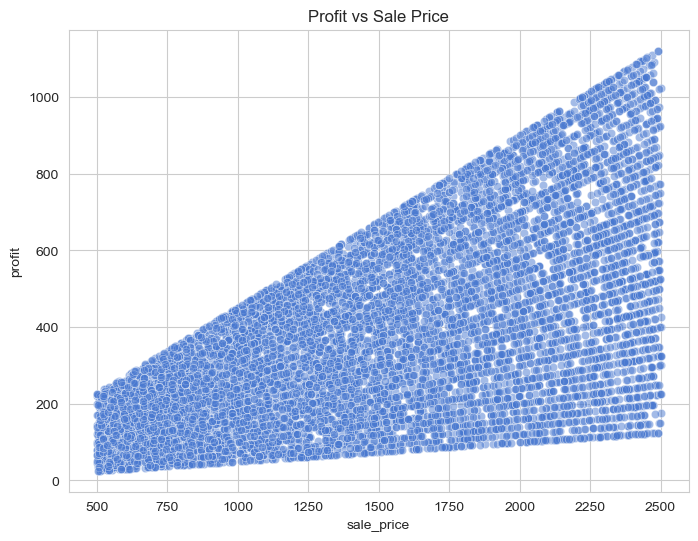

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=sgs, y='profit', x='discount_amount', alpha=0.5)
plt.title('Profit vs Discount Amount')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=sgs, y='profit', x='sale_price', alpha=0.5, y_jitter=True, x_jitter=True)
plt.title('Profit vs Sale Price')
plt.show()

As we know from the correlation data, there is a positive correlation for both of the relationships. Let's take a look at the slope for linear regression before we end this section of analysis.

In [38]:
res = linregress(sgs['sale_price'], sgs['profit'])
print(res.slope)

0.2514837215146423


In [39]:
res = linregress(sgs['discount_amount'], sgs['profit'])
print(res.slope)

0.3539652446669726


The slope value for both sale price and discount amount is around 0.25~0.35. This means that considering the variables indepedently, there is an increase of 0.25/0.35 per unit increase in sale price or discount amount respectively.

## Conclusion
Here are the findings from the EDA section:

* The sale price of items are uniformly distributed, while the profit and discount amount is a right skewed distribution.
* An increasing trend over time in the sales count, sales amount and profit was observed
* A pattern was observed when the orders were categorized by months,
	* There are higher amount of sales in the months September, November and December
	* There are lower amount of sales in the months January and February
* A certain level of positive correlation exists when examining the profit against the sale price(corr = 0.25) and the discount amount (corr = 0.35)